In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [2]:
number2name = {
    'MBON01': r"$\gamma5\beta'2a$",
    'MBON02': r"$\beta2\beta'2a$",
    'MBON03': r"$\beta'2mp$",
    'MBON04': r"$\beta'2mp\_bilateral$",
    'MBON05': r"$\gamma4>\gamma1\gamma2$",
    'MBON06': r"$\beta1>\alpha$",
    'MBON07': r"$\alpha1$",
    'MBON08': r"$\gamma3$",
    'MBON09': r"$\gamma3\beta'1$",
    'MBON10': r"$\beta'1$",
    'MBON11': r"$\gamma1pedc>\alpha/\beta$",
    'MBON12': r"$\gamma2\alpha'1$",
    'MBON13': r"$\alpha'2$",
    'MBON14': r"$\alpha3$",
    'MBON15': r"$\alpha'1\;(\alpha'1\alpha'2)$",
    'MBON16': r"$\alpha'3ap$",
    'MBON17': r"$\alpha'3m \; (\alpha'2\alpha'3)$",
    'MBON18': r"$\alpha2sc$",
    'MBON19': r"$\alpha2p3p$",
    'MBON20': r"$\gamma1\gamma2$", # I think - could not find an actual conversion in literature
    'MBON21': r"$\gamma4\gamma5$",
    'MBON22': r"$calyx$",
    'MBON23': r"$\alpha 2sp$"
}
mbon_types = [k for k,v in number2name.items()]
mbon_types_greek = [v for k,v in number2name.items()]

# for k,v in number2name.items():
#     display(Latex(v))

In [3]:
def plot_matrix(matrix, labels, title, cbar_title, size=[8,8]):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(matrix)


    plt.yticks(range(len(labels)), labels, rotation=30)
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.title(title, fontsize=24)
    plt.xlabel('Source', fontsize=24)
    plt.ylabel('Target', fontsize=24)

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            col = 'white' if matrix[i, j] < matrix.max()/2 else 'black'
            text = ax.text(j, i, int(matrix[i, j]),
                           ha="center", va="center", color=col)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel(cbar_title, rotation=-90, va="bottom", fontsize=24)

    plt.tight_layout()

## MBON-MBON 
Axo-dendritic connections between typical MBONs inside the MB only. Data taken from Fig 24 Li et al 2020.

Li et al used a threshold of 30 synapses

In [4]:
W = np.zeros([23,23])

# MBON-05
W[4, 10] = 197 
W[4, 0] = 30  # not given
W[4, 8] = 30 # not given 

# MBON-06
W[5, 22] = 104
W[5, 18] = 135
W[5, 17] = 100
W[5, 13] = 224
W[5, 6] = 290
W[5, 1] = 143

# MBON-11
W[10, 17] = 30 # not given
W[10, 13] = 30 # not given
W[10, 6] = 135
W[10, 1] = 30 # not given 
W[10, 2] = 30 # not given 
W[10, 0] = 30 # not given 

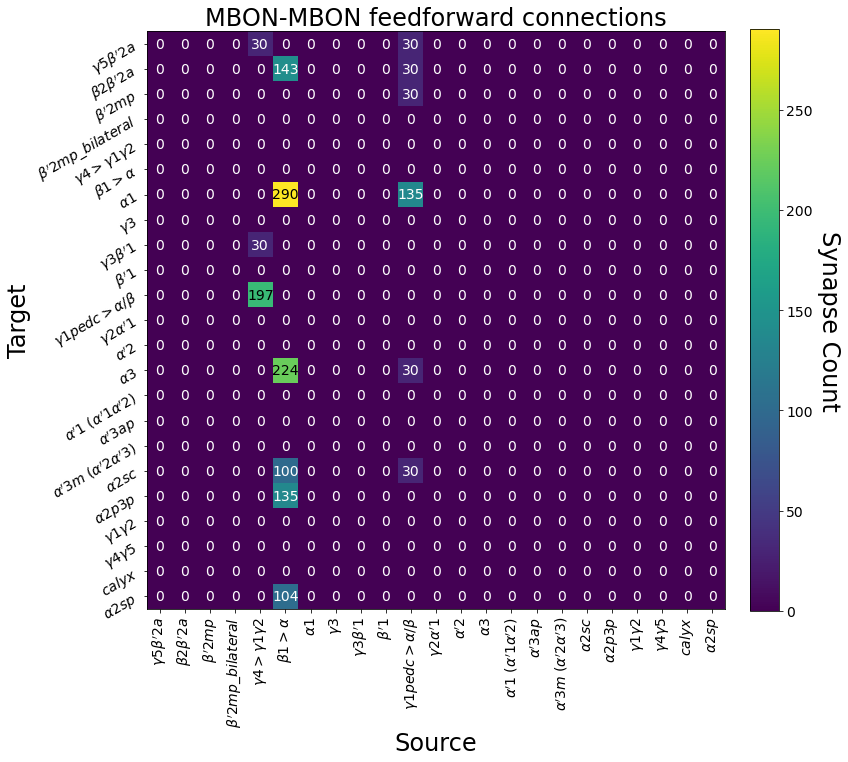

In [5]:
plt.rcParams["font.size"] = 14
plot_matrix(W.T, mbon_types_greek, 'MBON-MBON feedforward connections', 'Synapse Count', size=[12,12])

# plt.savefig('mbon-connectomics-cells.png')

In [6]:
greek_lobes = [
    r"$\alpha'_1$", r"$\alpha'_2$", r"$\alpha'_3$", 
    r'$\alpha_1$', r'$\alpha_2$', r'$\alpha_3$', 
    r"$\beta'_1$", r"$\beta'_2$",
    r'$\beta_1$', r'$\beta_2$', 
    r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$', r'$\gamma_5$'
]

Convert connectomics from cell-space to compartment-space. The weightings are based on Fig 12 in Aso 2014.

In [7]:
L = np.zeros([15,15])

# Note: The following mapping is used to convert from cell space to lobe space
# (cell number) <cell name> : lobe

# Mappings from compartment \beta1:

# (MBON06) \beta1 > \alpha : alpha2
L[4,8] = 104    # \alpha_2sp
L[4,8] += 135    # \alpha_2p3p
L[4,8] += 100    # \alpha_2sc

# (MBON06) \beta1 > \alpha : alpha3
L[5,8] = 224    # \alpha3
L[5,8] += 0.5 * 135   # \alpha_2p3p (weak connection - Aso)

# (MBON06) \beta1 > \alpha : alpha1
L[3,8] = 290    # \alpha1

# (MBON06) \beta1 > \alpha : beta2
L[9,8] = 143    # \beta2\beta'2a

# (MBON06) \beta1 > \alpha : beta'2
L[7,8] = 0.5 * 143    # \beta2\beta'2a (weak)

In [8]:
# Mappings from compartment \gamma4

# (MBON05): \gamma4>\gamma1\gamma2 : \gamma1
L[10,13] = 197   # \gamma1pedc>\alpha/\beta

# (MBON05): \gamma4>\gamma1\gamma2 : \gamma3
L[12,13] = 30   # \gamma3\beta'1

# (MBON05): \gamma4>\gamma1\gamma2 : \beta'1
L[6,13] = 30    # \gamma3\beta'1

# (MBON05): \gamma4>\gamma1\gamma2 : \gamma5
L[14,13] = 30   # \gamma5\beta'2a

# (MBON05): \gamma4>\gamma1\gamma2 : \beta'2
L[7,13] = 30    # \gamma5\beta'2a

In [9]:
# Mappings from compartment \gamma1

# (MBON11): \gamma1pedc>\alpha/\beta : \alpha2
L[4,10] = 30   # \alpha2sc

# (MBON11): \gamma1pedc>\alpha/\beta : \alpha3
L[5,10] = 30   # \alpha3

# (MBON11): \gamma1pedc>\alpha/\beta : \alpha1
L[3,10] = 135   # \alpha1

# (MBON11): \gamma1pedc>\alpha/\beta : \beta'2
L[7,10] = 30    # \beta'2mp
L[7,10] += 0.5 * 30   # \beta2\beta'2a (weak)
L[7,10] += 30   # \gamma5\beta'2a

# (MBON11): \gamma1pedc>\alpha/\beta : \beta2
L[9,10] = 30   # \beta2\beta'2a

# (MBON11): \gamma1pedc>\alpha/\beta : \gamma5
L[14,10] = 30   # \gamma5\beta'2a


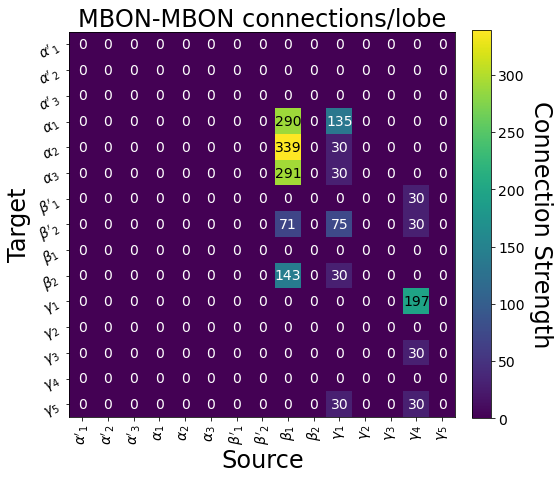

In [10]:
plot_matrix(L, greek_lobes, 'MBON-MBON connections/lobe', 'Connection Strength')
plt.savefig('mbon-connectomics-compartments.png')

In [11]:
mask = (L>0) * 1
mask

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [12]:
from pathlib import Path

DATA_DIR = Path('../data')
np.save(DATA_DIR / 'mbon-connectomics.npy', L, allow_pickle=True)

## DAN-MBON Connectome

This is currently unknown. Although it is approximately diagonal. The presence of connections here is loosely based on Fig 12 Aso 2014.

In [13]:
D = np.diag(np.ones(15))

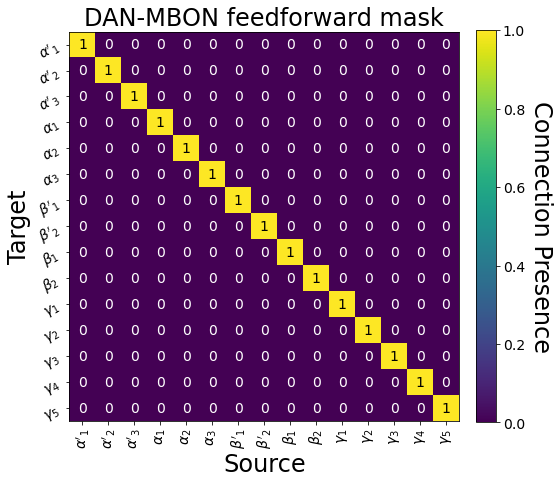

In [14]:
plot_matrix(D, greek_lobes, 'DAN-MBON feedforward mask', 'Connection Presence')